# Project - Classification of Human Activities

Disciplina de Tópicos de Ciência de Dados

Joana Simões, nº 2019217013

In [6]:
# imports 
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
import pandas as pd
from sklearn import preprocessing
import scipy
import os
import seaborn as sns
from skfeature.function.similarity_based import fisher_score, reliefF
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Exercise 1.1

In [8]:
def split_train_test(X, y, percentage_test=0.3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test, random_state=42)
    return x_train, x_test, y_train, y_test

In [9]:
def split_train_test_validation(X, y, percentage_test=0.3, percentage_validation=0.3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test, random_state=42)
    percent = (len(X)*percentage_validation) / len(x_train)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=percent, random_state=42)

    return x_train, x_val, x_test, y_train, y_val, y_test

In [10]:
def split_k_fold(X, y, k_folds):
    x_train = []
    x_test = []
    y_train = []
    y_test = []

    k_fold = KFold(n_splits=k_folds, random_state=42, shuffle=True)

    for train_index, test_index in k_fold.split(X):
        x_train.append(X.loc[train_index])
        y_train.append(y[train_index])
        x_test.append(X.loc[test_index])
        y_test.append(y[test_index])

    return x_train, x_test, y_train, y_test

## Exercise 1.2

In [11]:
def plot_percentages(classes_groups, labels=None, title=''):
    plt.figure()
    plt.pie(classes_groups, labels=labels, autopct='%.0f%%')
    plt.title(title)
    plt.show()

In [12]:
def display_confusion_matrix(cm, labels=None, title=''):
    plt.figure()
    display = ConfusionMatrixDisplay(cm, display_labels=labels)
    display.plot()
    plt.title(title)
    plt.show()

In [13]:
def calculate_confusion_matrix(y, y_pred, labels=None, display=True, title=''):
    cm = confusion_matrix(y, y_pred, labels=labels)
    if display:
        display_confusion_matrix(cm, labels, title=title)
    if not display:
        return cm

In [14]:
def calculate_recall(y, y_pred, metric=None):
    score = recall_score(y, y_pred, average=metric)
    return score

In [15]:
def calculate_precision(y, y_pred, metric=None):
    return precision_score(y, y_pred, average=metric)

In [16]:
def calculate_f1(y, y_pred, metric=None):
    return f1_score(y, y_pred, average=metric)

In [17]:
def plot_measures(recalls, precisions, f1_scores, title=''):
    plt.figure()
    x = np.arange(1, len(recalls)*2, 2)
    plt.plot(x, recalls, label='Recall')
    plt.plot(x, precisions, label='Precision')
    plt.plot(x, f1_scores, label='F1 score')
    plt.xlabel('K values')
    plt.ylabel('Result')
    plt.title(title)
    plt.legend()
    plt.show()

## Exercise 2 -Test TTS e CV with KNN

Nos testes elaborados abaixo, foi utilizada a métrica do F1-score para comparar a performance de diferentes modelos (ou parâmetros deste). Foram utilizados apenas valor ímpares para o calculo do melhor número de vizinhos, uma vez que ambos para não existirem empates na escolha da classe a que um "ponto" pertence.

In [18]:
def load_dataset():
    iris_dataset = datasets.load_iris(as_frame=True)
    X = iris_dataset.data
    y = iris_dataset.target
    target_names = iris_dataset.target_names
    return X, y, target_names

In [19]:
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [20]:
def load_activities_dataset():
    features_path = os.path.join('results', 'extracted_features.csv')
    X = pd.read_csv(features_path)
    y = X.pop('activity')
    return X, y

In [21]:
X_iris, y_iris, target_names = load_dataset()

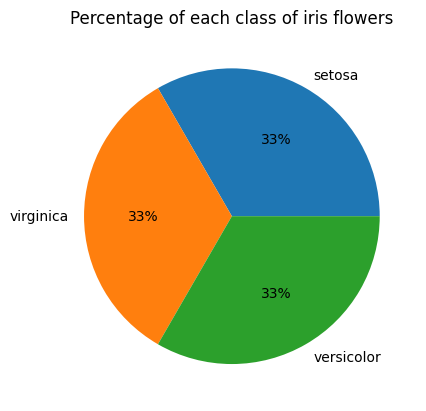

In [19]:
plot_percentages(y_iris.value_counts().sort_index(), labels=['setosa', 'virginica', 'versicolor'], title='Percentage of each class of iris flowers')

### Train-only : k=1

In [20]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_iris,  y_iris)
y_pred = model.predict(X_iris)

Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 640x480 with 0 Axes>

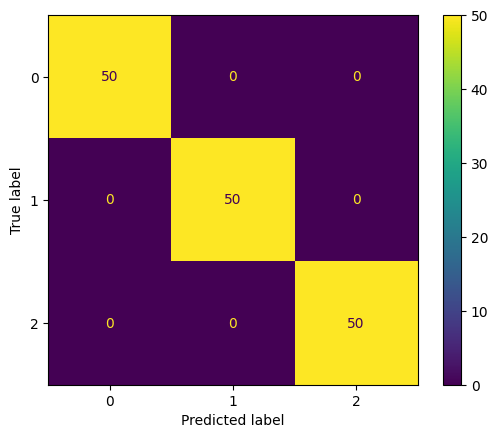

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [21]:
print('Recall:', calculate_recall(y_iris, y_pred, 'weighted'))
print('Precision:',calculate_precision(y_iris, y_pred, 'weighted'))
print('F1 score:',calculate_f1(y_iris, y_pred, 'weighted'))
calculate_confusion_matrix(y_iris, y_pred)

Ao utilizar os mesmos dados para treino e teste, e com um K=1 no *K-nearest neighbors*, ou seja, utilizando o valor do próprio ponto, como era de esperar, o resultado é que o modelo consegue prever todas as classes na totalidade. 

### Train-test 70-30 - k=1

In [29]:
x_train, x_test, y_train, y_test = split_train_test(X_iris, y_iris, 0.3)

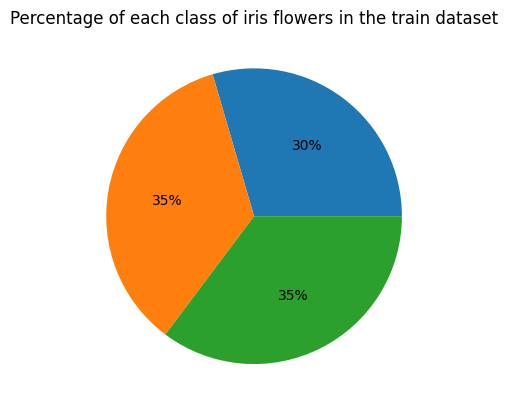

In [30]:
plot_percentages(list(y_train.value_counts().sort_index()), title='Percentage of each class of iris flowers in the train dataset')

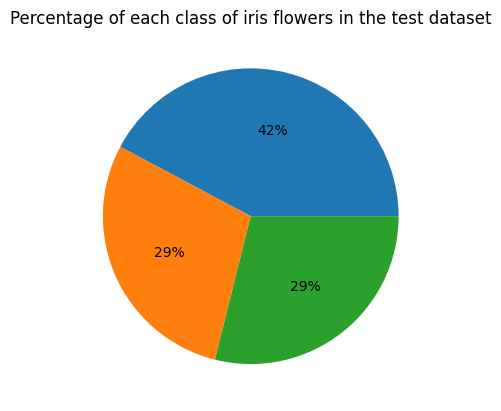

In [31]:
plot_percentages(list(y_test.value_counts().sort_index()), title='Percentage of each class of iris flowers in the test dataset')


Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 640x480 with 0 Axes>

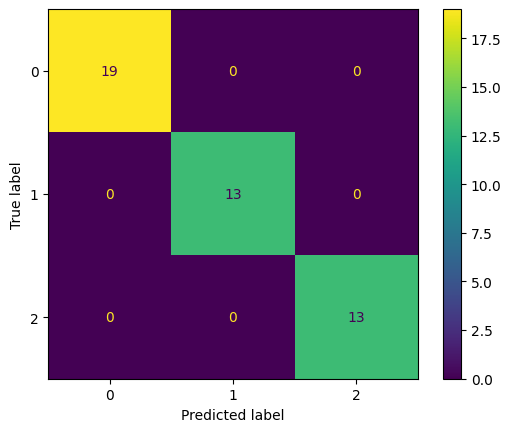

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [32]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:',calculate_precision(y_test, y_pred, 'weighted'))
print('F1 score:',calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred)

Utilizando 70% do dataset para treino e 30% do dataset para teste, e havendo uma distribuição mais ou menos uniforme de cada classe nos dois datasets, é possível observar que o modelo K-nearest neighbors com um k=1, ou seja, utilizando apenas o ponto mais próximo na predição, obtem bons resultados nos testes. Isto deve-se ao facto de as classes estarem distribuidas de tal forma que é possível separá-las e, assim, prever os pontos com exatidão. 

### 10CV - k=1

In [33]:
def cross_validation_test(iters, X, y, k_folds=10):
    iters_recalls = []
    iters_precisions = []
    iters_f1_scores = []
    x_train, x_test, y_train, y_test = split_k_fold(X, y, k_folds)
    for iter in range(1, iters+1, 2):
        recalls = []
        precisions = []
        f1_scores = []
        for i in range(len(x_train)):
            model = KNeighborsClassifier(n_neighbors=iter)
            model.fit(x_train[i], y_train[i])
            y_pred = model.predict(x_test[i])

            recalls.append(calculate_recall(y_test[i], y_pred))
            precisions.append(calculate_precision(y_test[i], y_pred))
            f1_scores.append(calculate_f1(y_test[i], y_pred))
        r_mean = np.mean(recalls)
        p_mean = np.mean(precisions)
        f_mean = np.mean(f1_scores)
        print(f'********* Averages - k={iter} **********')
        print('Recall:', r_mean)
        print('Precision:',p_mean)
        print('F1 Score:', f_mean)

        iters_recalls.append(r_mean)
        iters_precisions.append(p_mean)
        iters_f1_scores.append(f_mean)
    if iters > 1:
        plot_measures(iters_recalls, iters_precisions, iters_f1_scores)
        print('Best k')
        print('Recall: ', 2*np.argmax(iters_recalls)+1)
        print('Precision: ', 2*np.argmax(iters_precisions)+1)
        print('F1-Score: ', 2*np.argmax(iters_f1_scores)+1)
        return 2*np.argmax(f1_scores)+1
    return 2*np.argmax(f1_scores)+1


In [34]:
bests = cross_validation_test(1, X_iris, y_iris)

********* Averages - k=1 **********
Recall: 0.9607936507936509
Precision: 0.9615079365079366
F1 Score: 0.9588337588337589


### Train only - multiple k values

In [37]:
def train_only_test(iters, X, y):
    recalls = []
    precisions = []
    f1_scores = []
    for i in range(1, iters+1, 2):
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(X, y)
        y_pred = model.predict(X)
        recall = calculate_recall(y, y_pred, 'weighted')
        recalls.append(recall)
        precision = calculate_precision(y, y_pred,  'weighted')
        precisions.append(precision)
        f1 = calculate_f1(y, y_pred,  'weighted')
        f1_scores.append(f1)
        print(f'********* Averages - k={i} **********')
        print('Recall:', recall)
        print('Precision:',precision)
        print('F1 Score:', f1)
    if iters > 1:
        plot_measures(recalls, precisions, f1_scores)
        print('Best k')
        print('Recall: ', 2*np.argmax(recalls)+1)
        print('Precision: ', 2*np.argmax(precisions)+1)
        print('F1-Score: ', 2*np.argmax(f1_scores)+1)
        return 2*np.argmax(f1_scores)+1

********* Averages - k=1 **********
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
********* Averages - k=3 **********
Recall: 0.96
Precision: 0.96
F1 Score: 0.96
********* Averages - k=5 **********
Recall: 0.9666666666666667
Precision: 0.9667867146858743
F1 Score: 0.9666633329999667
********* Averages - k=7 **********
Recall: 0.9733333333333334
Precision: 0.9738247863247864
F1 Score: 0.9733226623982927
********* Averages - k=9 **********
Recall: 0.98
Precision: 0.980125383486728
F1 Score: 0.9799979997999799
********* Averages - k=11 **********
Recall: 0.9733333333333334
Precision: 0.9733333333333334
F1 Score: 0.9733333333333334
********* Averages - k=13 **********
Recall: 0.98
Precision: 0.980125383486728
F1 Score: 0.9799979997999799
********* Averages - k=15 **********
Recall: 0.9866666666666667
Precision: 0.9866666666666667
F1 Score: 0.9866666666666667


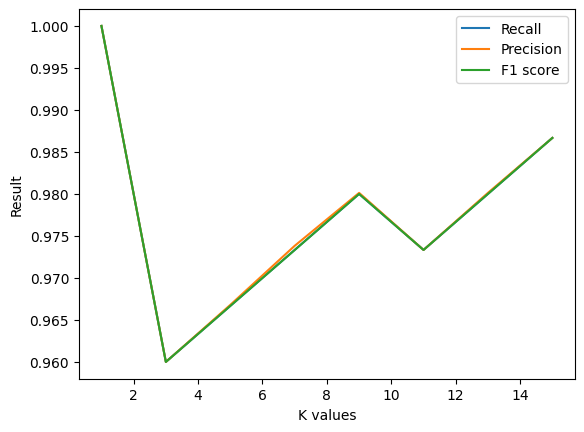

Best k
Recall:  1
Precision:  1
F1-Score:  1


In [38]:
best_k_train_only = train_only_test(15, X_iris, y_iris)

In [39]:
model = KNeighborsClassifier(n_neighbors=best_k_train_only)
model.fit(X_iris, y_iris)
y_pred = model.predict(X_iris)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

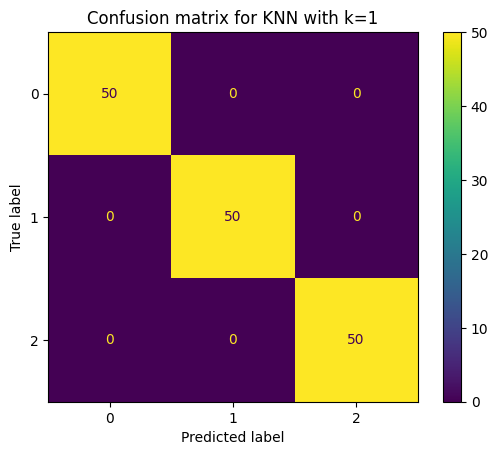

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [41]:
print('Recall:', calculate_recall(y_iris, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_iris, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_iris, y_pred, 'weighted'))
calculate_confusion_matrix(y_iris, y_pred, title=f'Confusion matrix for KNN with k={best_k_train_only}')

Utilizando os mesmos dados para treino e teste mostra que o melhor k do K-nearest neighbors continua a ser o K=1, uma vez que como são os mesmos dados, o modelo utiliza o proprio ponto previamente guardado para prever, ou seja, acerta 100% das vezes. 

### TVT 40-30-30 - multiple k values

In [42]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X_iris, y_iris)

In [43]:
def tvt_test(iters, x_train, x_val, y_train, y_val):
    recalls = []
    precisions = []
    f1_scores = []
    for i in range(1, iters+1, 2):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        recall = calculate_recall(y_val, y_pred, 'weighted')
        recalls.append(recall)
        precision = calculate_precision(y_val, y_pred,  'weighted')
        precisions.append(precision)
        f1 = calculate_f1(y_val, y_pred,  'weighted')
        f1_scores.append(f1)
        print(f'********* Averages - k={i} **********')
        print('Recall:', recall)
        print('Precision:',precision)
        print('F1 Score:', f1)

    if iters > 1:
        plot_measures(recalls, precisions, f1_scores)
        print('Best k')
        print('Recall: ', 2*np.argmax(recalls)+1)
        print('Precision: ', 2*np.argmax(precisions)+1)
        print('F1-Score: ', 2*np.argmax(f1_scores)+1)
        return 2*np.argmax(f1_scores)+1

********* Averages - k=1 **********
Recall: 0.9111111111111111
Precision: 0.9111111111111111
F1 Score: 0.9111111111111111
********* Averages - k=3 **********
Recall: 0.9555555555555556
Precision: 0.9611111111111111
F1 Score: 0.955648148148148
********* Averages - k=5 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=7 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=9 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=11 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=13 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333
********* Averages - k=15 **********
Recall: 0.9333333333333333
Precision: 0.9450980392156864
F1 Score: 0.9333333333333333


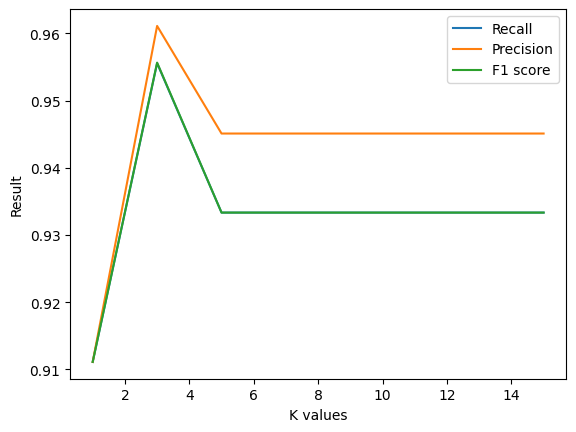

Best k
Recall:  3
Precision:  3
F1-Score:  3


In [44]:
best_k = tvt_test(15, x_train, x_val, y_train, y_val)

Pode-se observar-se que todos tiveram os mesmos resultados, pelo que se escolher o k=1 por ser mais simples

#### retrain the model using the best k

In [45]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [46]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total, y_train_total)
y_pred = model.predict(x_test)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

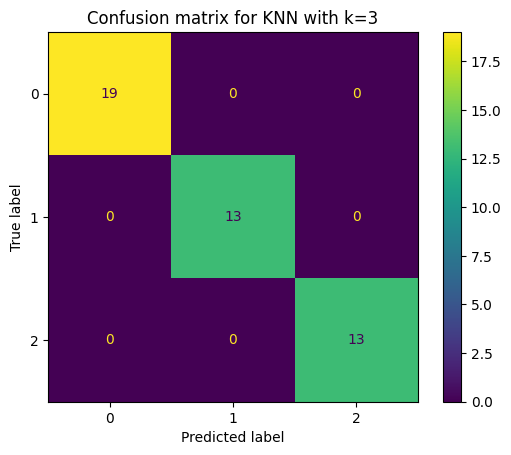

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [47]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k}')

Neste teste, foi utilizado 40% do dataset para teste e 30% do dataset para validação. Com estes datasets, foi calculado o melhor k para o modelo, sendo este o k=3 como referido anteriormente. Após calcular o melhor k, juntaram-se os dois datasets e o modelo foi novamente treinado com o k ideal. Por último,foi utilizado 30% do dataset inicial previamente guardado e foi testada a precisão do modelo. Como se pode observar, o modelo consegui prever com exatidão a totalidade dos dados de teste.

### 10 CV - multiple k values

********* Averages - k=1 **********
Recall: 0.9607936507936509
Precision: 0.9615079365079366
F1 Score: 0.9588337588337589
********* Averages - k=3 **********
Recall: 0.9663492063492064
Precision: 0.9738095238095238
F1 Score: 0.964938764938765
********* Averages - k=5 **********
Recall: 0.9730158730158731
Precision: 0.9785714285714285
F1 Score: 0.9712065712065712
********* Averages - k=7 **********
Recall: 0.9552380952380953
Precision: 0.9585714285714285
F1 Score: 0.9487991637991638
********* Averages - k=9 **********
Recall: 0.9746825396825397
Precision: 0.9754761904761905
F1 Score: 0.9723461723461725
********* Averages - k=11 **********
Recall: 0.9746825396825397
Precision: 0.9754761904761905
F1 Score: 0.9723461723461725
********* Averages - k=13 **********
Recall: 0.9746825396825397
Precision: 0.9754761904761905
F1 Score: 0.9723461723461725
********* Averages - k=15 **********
Recall: 0.9691269841269842
Precision: 0.9704761904761905
F1 Score: 0.9651383801383803


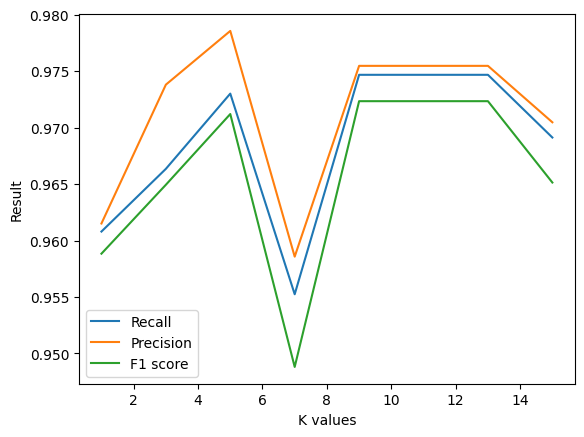

Best k
Recall:  9
Precision:  5
F1-Score:  9


In [48]:
best_k_cv = cross_validation_test(15, X_iris, y_iris, k_folds=10)

Como se pode observar o k=5 é o que obtêm os melhores resultados nas médias dos resultados da cross-validation.

Neste caso o modelo não foi novamente retreinado, uma vez que o melhor k foi calculado aatravés de cross-valiadation, ou sej, pela média dos diferentes splits para cada k.

## ReliefF - Ex.2.2

In [21]:
def plot_elbow(f1_scores, k_model, metric=None, title=None, xlabel=None):
    f1_scores = [0] + f1_scores
    plt.figure()
    plt.plot(np.arange(len(f1_scores)), f1_scores, '*-')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(f1_scores) + 0.2)
    if title is None:
        plt.title(f'Plot with the features used, using the model KNN with k={k_model}, features ranked using {metric}')
    else:
        plt.title(title)
    plt.ylabel(f'F1 score')
    if xlabel is None:
        plt.xlabel(f'Nº features used')
    else:
        plt.xlabel(xlabel)
    plt.show()

In [22]:
def plot_elbows(scores, k_values):
    plt.figure(figsize=(15, 7))
    x = np.arange(0, len(scores[0])+1)
    x = x.astype(int)
    for k in range(len(k_values)):
        plt.plot(x, [0] + scores[k], '*-', label=k_values[k])
    plt.legend()
    plt.xlabel('Number features used')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(scores[0])+0.2)
    plt.ylabel('F1-Score')
    plt.title('F1-scores for each value of K in the KNN and number of features used')
    plt.show()

In [23]:
def order_features(x_train, y_train, metric='reliefF'):
    if metric == 'reliefF':
        # ReliefF
        print('reliefF')
        score = reliefF.reliefF(x_train.to_numpy(), y_train.to_numpy())
    else:
        # fisher
        print('fisher')
        score = fisher_score.fisher_score(x_train.to_numpy(), y_train.to_numpy())
    
    features_ranked = (-score).argsort()
    features = x_train.columns

    print(f'Features ranked by {metric}:')
    print(list(features[features_ranked]))
    print(f'Scores:')
    print(score)

    return list(features[features_ranked])

In [24]:
def best_model_feature_and_k(x_train, x_val, y_train, y_val, features, function='ReliefF', plot=False, k_max=15, step=2):
    df = pd.DataFrame()

    max_score = 0
    best_k = 0
    best_n_features = 0

    features_scores = []
    k_values = []

    for k in range(1, k_max+1, step):
        f1_scores = []
        for n_features in range(1, len(features)+1):
            features_to_use = features[:n_features]
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(x_train[features_to_use], y_train)
            y_pred = model.predict(x_val[features_to_use])
            f1 = calculate_f1(y_val, y_pred,  'weighted')
            if f1 > max_score:
                max_score = f1
                best_k = k
                best_n_features = n_features
            f1_scores.append(f1)
        features_scores.append(f1_scores)
        k_values.append(k)
        df[f'K{k}'] = pd.Series(np.array(f1_scores))
        if plot:
            plot_elbow(f1_scores, k, function)

    plot_elbows(features_scores, k_values)

    df = df.set_index(np.arange(1, len(features)+1))
    print('Max f1-score: ', max_score)
    print('Best k: ', best_k)
    print('Best number features:', best_n_features)
    return df, best_k, best_n_features

In [25]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X_iris, y_iris)

In [26]:
relieff_features = order_features(x_train, y_train)

reliefF
Features ranked by reliefF:
['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
Scores:
[178.42897187 115.47781074 563.99357289 238.41156522]


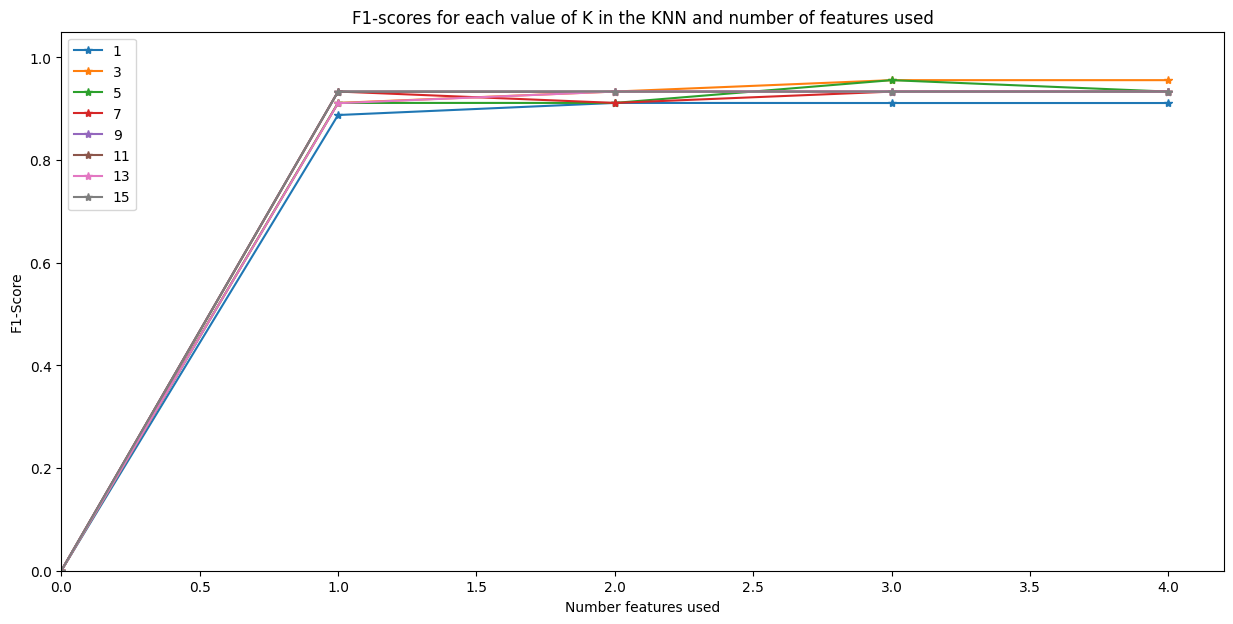

Max f1-score:  0.955648148148148
Best k:  3
Best number features: 3


In [27]:
results, best_k, best_n_features_relief = best_model_feature_and_k(x_train, x_val, y_train, y_val, relieff_features, plot=False)

In [28]:
results

,K1,K3,K5,K7,K9,K11,K13,K15
1,0.887728,0.911296,0.911296,0.933473,0.933333,0.933333,0.910741,0.933333
2,0.911296,0.933473,0.911296,0.911296,0.933333,0.933333,0.933473,0.933333
3,0.911111,0.955648,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333
4,0.911111,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333


#### retrain best model

In [29]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [30]:
features_to_use = relieff_features[:best_n_features_relief]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

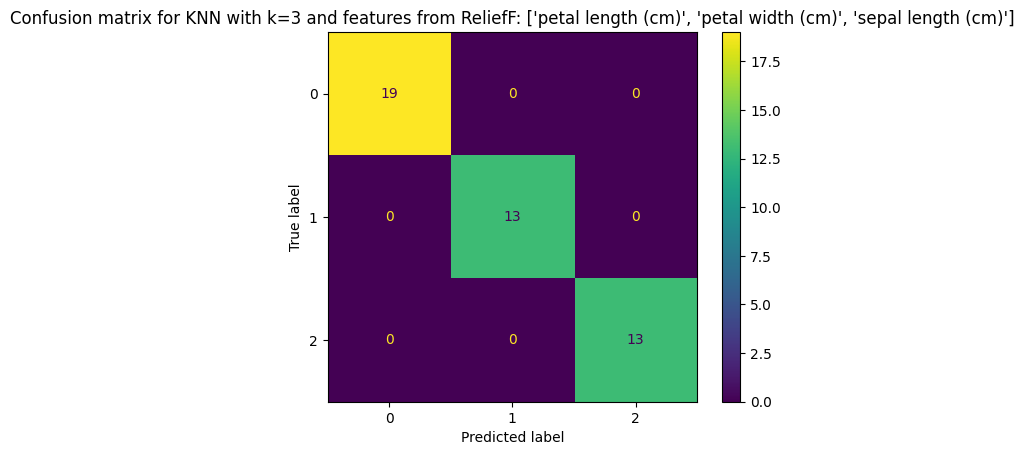

In [31]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k} and features from ReliefF: {features_to_use}')

Ao re-treinar o modelo com o número ideal de features e com o k (número de vizinhos ideal), é possivel observar pela matriz de confusão que o modelo consegue classificar com exatidão a amostra que foi guardada para treino.

## Fisher Score - Ex.2.3

In [60]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X_iris, y_iris)

In [61]:
fisher_features = order_features(x_train, y_train, 'fisher')

fisher
Features ranked by fisher:
['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
Scores:
[ 1.35226876  0.92830557 16.80956604 10.94547513]


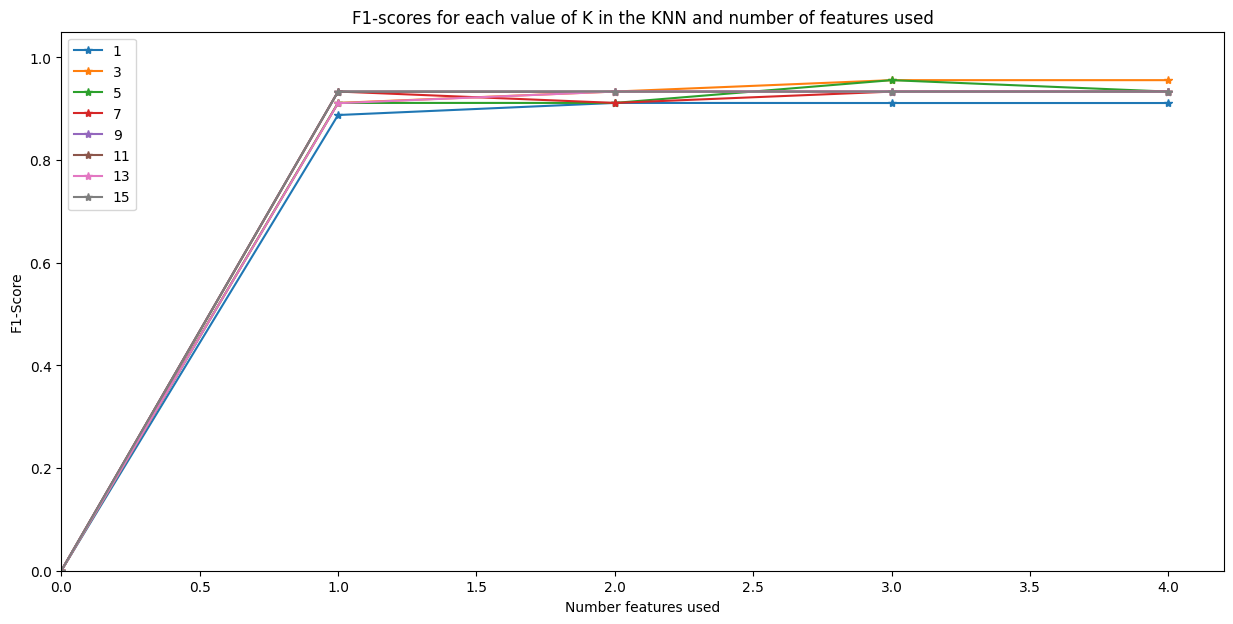

Max f1-score:  0.955648148148148
Best k:  3
Best number features: 3


In [65]:
results, best_k, best_n_features_fisher = best_model_feature_and_k(x_train, x_val, y_train, y_val, fisher_features, plot=False)

In [66]:
results

,K1,K3,K5,K7,K9,K11,K13,K15
1,0.887728,0.911296,0.911296,0.933473,0.933333,0.933333,0.910741,0.933333
2,0.911296,0.933473,0.911296,0.911296,0.933333,0.933333,0.933473,0.933333
3,0.911111,0.955648,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333
4,0.911111,0.955648,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333


#### retrain best model

In [67]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [68]:
features_to_use = fisher_features[:best_n_features_fisher]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

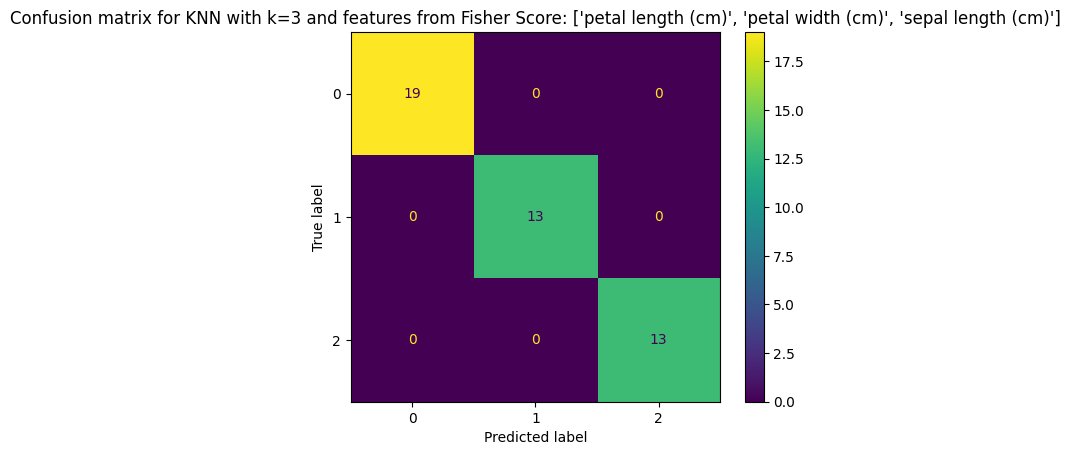

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [69]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k} and features from Fisher Score: {features_to_use}')

In [73]:
relieff_features[:best_n_features_relief]

['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']

In [74]:
fisher_features[:best_n_features_fisher]

['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']

Como a ordem de importância das features utilizando o Fisher Score e RelieF foram iguais, os resultados de melhor nº de features a utilizar e melhor K são iguais também.

## Ex 2.4 - restrict classes

In [70]:
indexes_setosa = pd.Series(y_iris[y_iris==0].index)
indexes_versicolor = pd.Series(y_iris[y_iris == 1].index).sample(30)
indexes_virginica = pd.Series(y_iris[y_iris==2].index).sample(10)

In [71]:
new_X = pd.concat([X_iris.loc[indexes_setosa], X_iris.loc[indexes_versicolor], X_iris.loc[indexes_virginica]], ignore_index=True)
new_y = pd.concat([y_iris[indexes_setosa], y_iris[indexes_versicolor], y_iris[indexes_virginica]], ignore_index=True)

In [75]:
classes_groups = list(new_y.value_counts().sort_index())

In [76]:
labels = ['setosa', 'virsicolor', 'virginica']

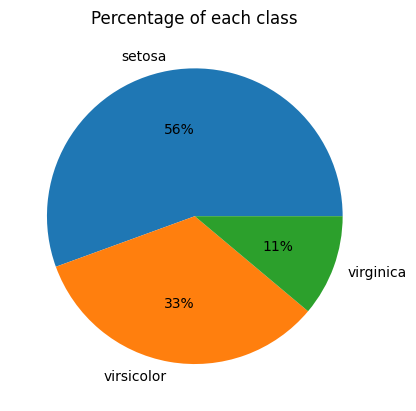

In [77]:
plt.figure()
plt.pie(classes_groups, labels=labels, autopct='%.0f%%')
plt.title('Percentage of each class')
plt.show()

In [78]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(new_X, new_y)

In [79]:
fisher_features = order_features(x_train, y_train, 'fisher')

fisher
Features ranked by fisher:
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']
Scores:
[ 1.84962109  0.45532074 20.70152158 20.71064195]


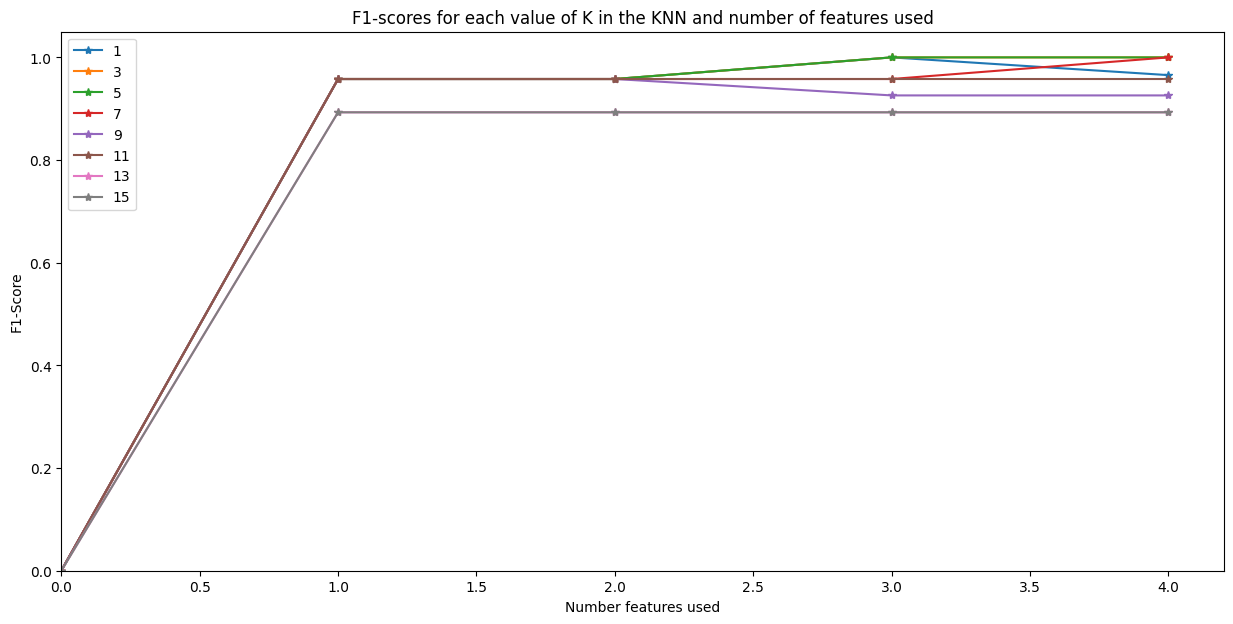

Max f1-score:  1.0
Best k:  1
Best number features: 3


In [80]:
results, best_k, best_n_features = best_model_feature_and_k(x_train, x_val, y_train, y_val, fisher_features, plot=False)

In [81]:
results

,K1,K3,K5,K7,K9,K11,K13,K15
1,0.957879,0.957879,0.957879,0.957879,0.957879,0.957879,0.893004,0.893004
2,0.957879,0.957879,0.957879,0.957879,0.957879,0.957879,0.893004,0.893004
3,1.000000,1.000000,1.000000,0.957879,0.925926,0.957879,0.893004,0.893004
4,0.965432,1.000000,1.000000,1.000000,0.925926,0.957879,0.893004,0.893004


#### retrain best model

In [82]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

In [85]:
features_to_use = fisher_features[:best_n_features]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.9259259259259259
Precision: 0.9259259259259259
F-Score: 0.9259259259259259


<Figure size 640x480 with 0 Axes>

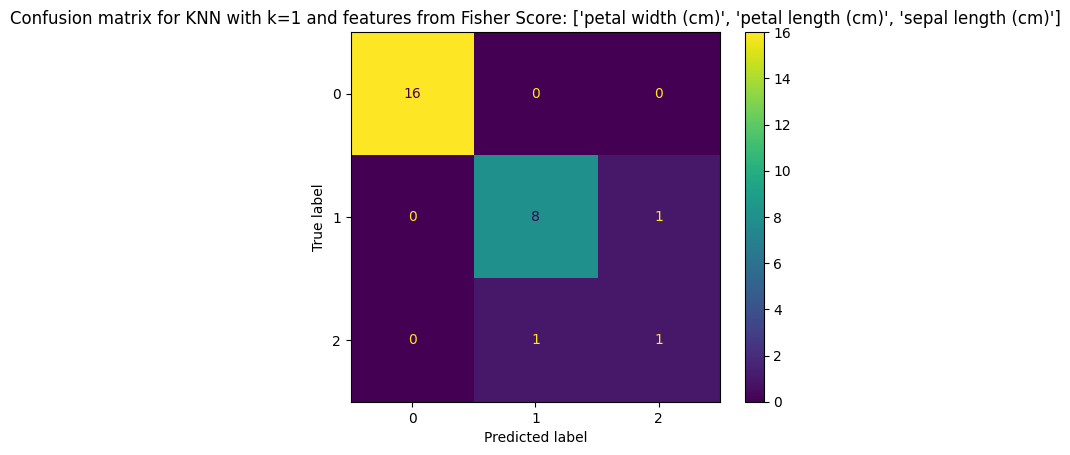

array([[16,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  1]], dtype=int64)

In [86]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, title=f'Confusion matrix for KNN with k={best_k} and features from Fisher Score: {features_to_use}')

Verifica-se que ao pertubar as percentagens de cada tipo de flor no dataset, ou seja, ficando com um dataset desenbalaceado, a performance do modelo diminui quando comparado com os anteriores.

## Ex 3 - test in the human activities dataset

In [25]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 
}

In [26]:
X, y = load_activities_dataset()

In [27]:
data_activities = pd.DataFrame()
data_activities['activity'] = list(activities_labels.values())
data_activities['count'] = y.value_counts().sort_index()

In [28]:
def plot_hist(data, title=''):
    plt.figure()
    ax = sns.barplot(x=list(data.value_counts().sort_index().index), y=list(data.value_counts().sort_index()))
    for i in ax.containers:
        ax.bar_label(i,)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(title)

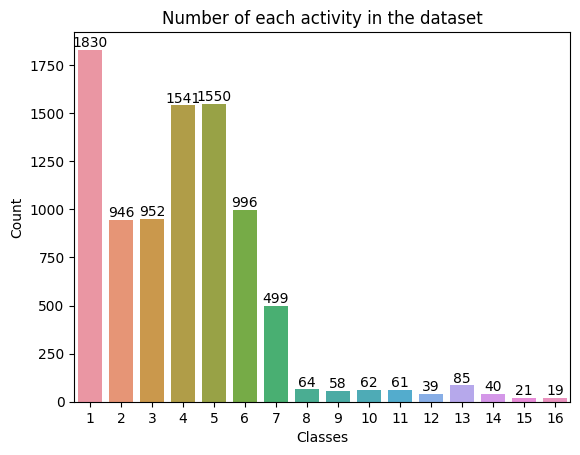

In [29]:
plot_hist(y, title='Number of each activity in the dataset')

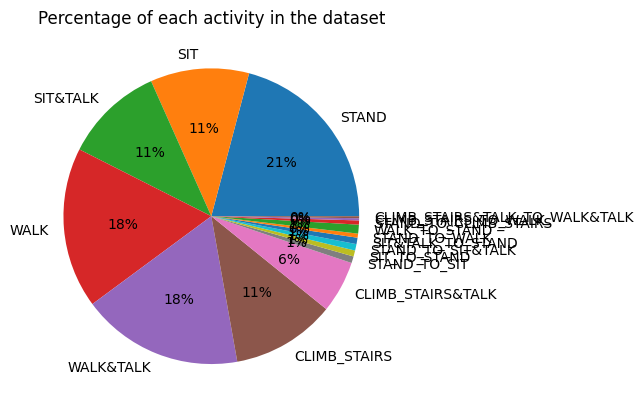

In [30]:
plot_percentages(list(y.value_counts().sort_index()), labels=list(activities_labels.values()), title='Percentage of each activity in the dataset')

Como se pode observar, não existe uma distribuição uniforme das atividades, algumas atividades existem em mais abundância que outras, podendo prever já há partida que o modelo terá dificildade em classificar as atividades.

In [31]:
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X, y)

In [51]:
x_train_total = pd.concat([x_train, x_val], ignore_index=True)
y_train_total = pd.concat([y_train, y_val], ignore_index=True)

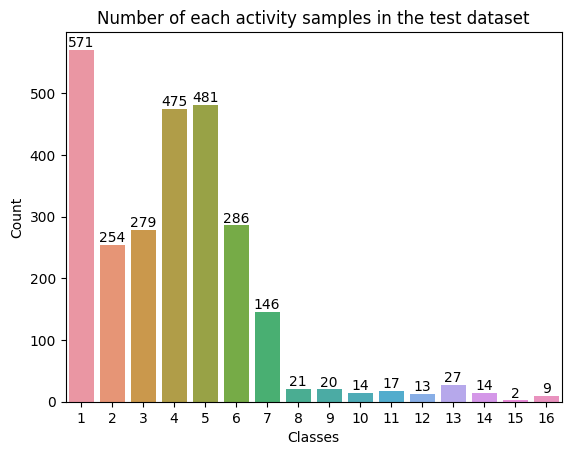

In [32]:
plot_hist(y_test, title='Number of each activity samples in the test dataset')

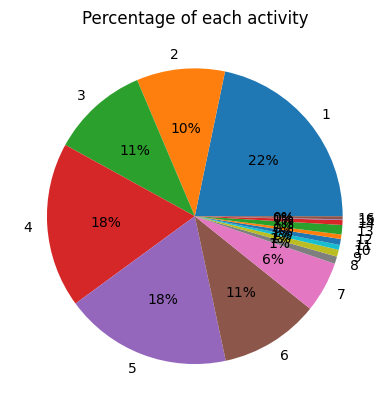

In [33]:
plot_percentages(list(y_test.value_counts().sort_index()), labels=list(y_test.value_counts().sort_index().index), title='Percentage of each activity')

Como se pode observar, o dataset não está balenceado, pele que pode já prever que a classificação das atividades não será muito correta.

In [34]:
%%time
relieff_features = order_features(x_train, y_train)

reliefF
Features ranked by reliefF:
['are', 'aae', 'accelerometer_x_energy', 'accelerometer_y_energy', 'accelerometer_z_energy', 'gyroscope_x_energy', 'gyroscope_y_energy', 'gyroscope_z_energy', 'magnetometer_x_energy', 'magnetometer_y_energy', 'magnetometer_z_energy', 'gyroscope_x_variance', 'gyroscope_y_variance', 'gyroscope_z_variance', 'avg', 'gyroscope_z_df', 'gyroscope_x_df', 'gyroscope_x_interquantile', 'gyroscope_y_interquantile', 'accelerometer_x_df', 'gyroscope_y_rms', 'gyroscope_y_df', 'gyroscope_x_std', 'gyroscope_x_rms', 'gyroscope_y_std', 'accelerometer_z_df', 'gyroscope_y_mean', 'gyroscope_y_median', 'accelerometer_z_mean_crossing_rate', 'magnetometer_z_mean_crossing_rate', 'accelerometer_y_mean_crossing_rate', 'magnetometer_x_mean_crossing_rate', 'gyroscope_z_interquantile', 'gyroscope_z_mean_crossing_rate', 'gyroscope_x_mean_crossing_rate', 'gyroscope_y_mean_crossing_rate', 'accelerometer_x_mean_crossing_rate', 'magnetometer_y_mean_crossing_rate', 'gyroscope_z_rms', 'g

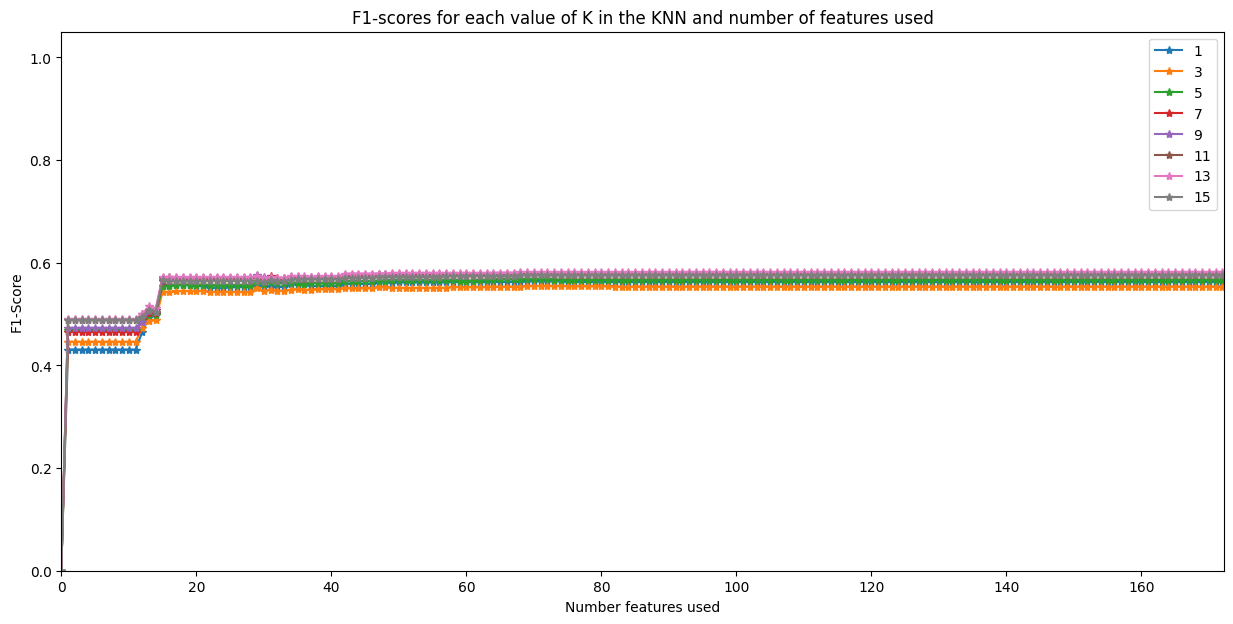

Max f1-score:  0.581995024774082
Best k:  13
Best number features: 92
CPU times: total: 19min 14s
Wall time: 4min 55s


In [155]:
%%time
results, best_k, best_n_features = best_model_feature_and_k(x_train, x_val, y_train, y_val, relieff_features, plot=False)

Pelo gráfico com os resultados do F1-score para os diferentes K do KNN e para X, sendo X o número de features a utilizar segundo o ReliefF, observa-se que a apartir de um certo ponto, o valor do F1-Score pouco se altera.
É tambem possível o K=13 para o KNN é o que aparenta ter os melhores resultados, para qualquer número de features utilizadas. 

Uma vez que os resultados pouco se alteram, e mesmo que o melhor modelo utilize um k=13 e as primeiras 92 duas features, talvez não compense utilizar tantas features, já que a melhoria é significativa, pelo que a seguir se realizaram teste sobre se realmente são precisas tantas features ou não.

#### retrain best model - 92 features

In [162]:
features_to_use = relieff_features[:best_n_features]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.5983263598326359
Precision: 0.5613018273224198
F-Score: 0.5760401062645587


<Figure size 640x480 with 0 Axes>

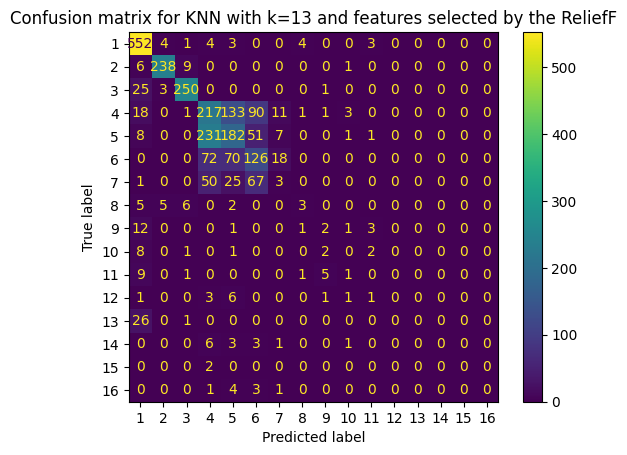

In [163]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for KNN with k={best_k} and features selected by the ReliefF')

Como era de esperar, verifica-se que o modelo tem dificuldade classificar a maioria das classes. As classes que estavam em menor quantidade no dataset, são todas classificadas erradamente, sendo que a maioria é classificada como uma das classes que aparece em maior número no dataset. 

Outro facto que pode contribuir para esta má classificação, é as atividades terem valores semelhantes nas diferentes features, e isso estar a enganar o modelo.

##### Retrain model - 47 features

In [35]:
features_to_use = relieff_features[:47]

In [171]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.5979459870673259
Precision: 0.5611369973200926
F-Score: 0.5758693097869406


<Figure size 640x480 with 0 Axes>

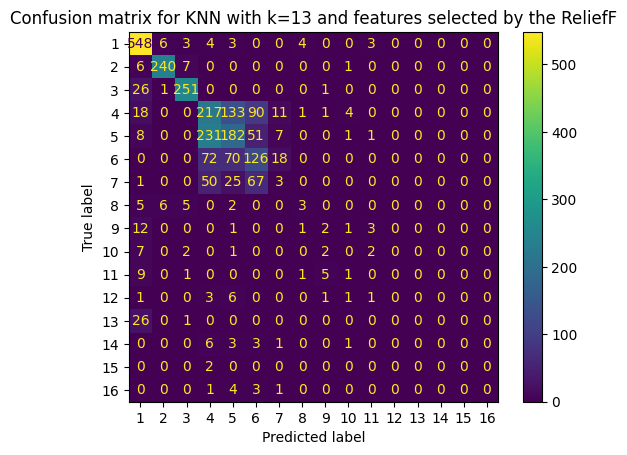

In [172]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for KNN with k={best_k} and features selected by the ReliefF')

Verifica-se que mesmo reduzindo o número de features de 92 para apenas 47, a performance do modelo mantém-se igual. Assim, como este valor é menor, ou seja, diminui-mos a dimensionalidade e complexidade do modelo, nos seguintes testes iremos utilizar apenas as primeiras 47 features.

## Ex.4 - Neural Network

In [36]:
def best_model(x_train, x_val, y_train, y_val, features, function='ReliefF', learning_rate='constant', step=10, max_units=500):
    max_score = 0
    best_k = 0
    scores = []
    units_list = []
    for units in range(len(features), max_units, step):
        model = MLPClassifier(hidden_layer_sizes=(units,), activation='logistic', learning_rate=learning_rate)
        model.fit(x_train[features], y_train)
        y_pred = model.predict(x_val[features])
        f1 = calculate_f1(y_val, y_pred,  'weighted')
        scores.append(f1)
        units_list.append(units)
        if f1 > max_score:
            max_score = f1
            best_k = units
    

    plt.figure()
    plt.plot(units_list, scores, '*-')
    plt.ylim(0, 1.05)
    plt.xlabel('No. units')
    plt.ylabel('f1-score')
    plt.title('F1-score of each number of units in the hidden layer')
    plt.show()

    print('Max f1-score: ', max_score)
    print('Best no. of neurons: ', best_k,)
    df = pd.DataFrame()
    df['f1-score'] = scores
    df['units'] = units_list
    return (df, best_k)

### Iris Dataset

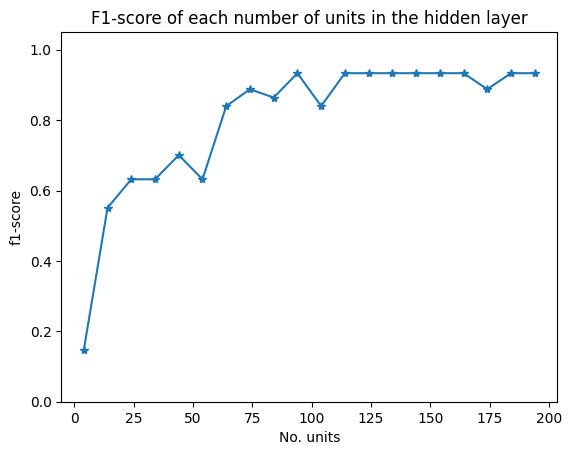

Max f1-score:  0.9333333333333333
Best no. of neurons:  94


In [135]:
X_iris, y_iris, _ = load_dataset()
# X_iris = normalize(X_iris)
x_train_iris, x_val_iris, x_test_iris, y_train_iris, y_val_iris, y_test_iris = split_train_test_validation(X_iris, y_iris)
df, best_units_iris = best_model(x_train_iris, x_val_iris, y_train_iris, y_val_iris, list(x_train_iris.columns), step=10, max_units=200)

In [132]:
df

,f1-score,units
0,0.147646,4
1,0.593227,14
2,0.593227,24
3,0.814625,34
4,0.667493,44
5,0.631852,54
6,0.760721,64
7,0.887728,74
8,0.933333,84
9,0.933333,94


#### retrain best model

In [136]:
model = MLPClassifier(hidden_layer_sizes=(best_units_iris,), activation='logistic', learning_rate='constant')
x_total_iris = pd.concat([x_train_iris, x_val_iris], ignore_index=True)
y_total_iris = pd.concat([y_train_iris, y_val_iris], ignore_index=True)
model.fit(x_total_iris, y_total_iris)
y_pred = model.predict(x_test_iris)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


<Figure size 640x480 with 0 Axes>

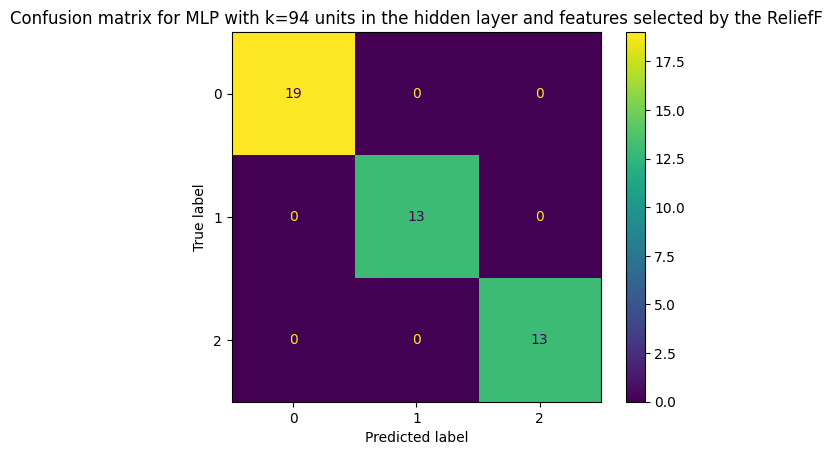

In [137]:
print('Recall:', calculate_recall(y_test_iris, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test_iris, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test_iris, y_pred, 'weighted'))
calculate_confusion_matrix(y_test_iris, y_pred,title=f'Confusion matrix for MLP with k={best_units_iris} units in the hidden layer and features selected by the ReliefF')

Apesar de ser recomendado normalizar as features antes de treinar as redes neuronais, ao treinar a MLP com as features normalizadas verificou-se a perfomance diminuia, optando-se então por não normalizar as features.  

### Human activities dataset

#### Fixed Learning rate

In [38]:
X, y = load_activities_dataset()
X = normalize(X)
x_train, x_val, x_test, y_train, y_val, y_test = split_train_test_validation(X, y)

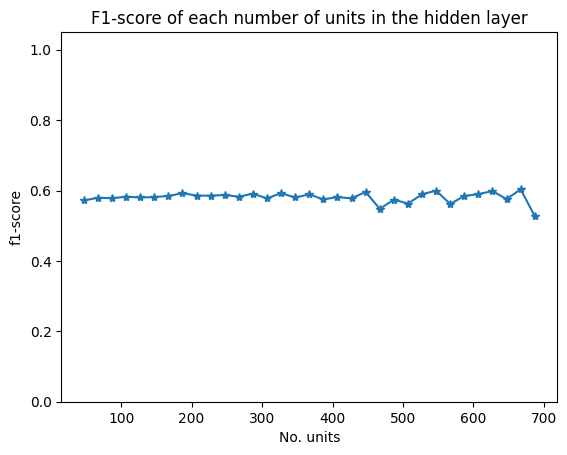

Max f1-score:  0.6034374801110332
Best no. of neurons:  667
CPU times: total: 3min 35s
Wall time: 9min 4s


In [39]:
%%time
df, best_n_units = best_model(x_train, x_val, y_train, y_val, features_to_use, step=20, max_units=700)

In [50]:
df[df['f1-score'] > 0.59]

,f1-score,units
7,0.592375,187
12,0.591095,287
14,0.592369,327
20,0.596229,447
25,0.599802,547
29,0.598538,627
31,0.603437,667


Verifica-se que o modelo MLP tem uma baixo F1-score. Para calcular o melhor modelo, foram testados diferentes números de neurónios na hidden layer, para as features já selecionadas anteriormente. Observa-se que que os resultados rondam sempre os 0.58-0.60, e observando o número de neurónios utilizados para os melhores f1-score, verifica-se que talvez não compense utilizar uma rete tão complexa com 667 neurónio, apesar de ter sido o número de neurónios com melhor resultado.

##### Retrain model - 667 neurons

In [52]:
model = MLPClassifier(hidden_layer_sizes=(best_n_units,), activation='logistic', learning_rate='constant')
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.6458729554963865
Precision: 0.6288537733195497
F-Score: 0.6224409781020696


<Figure size 640x480 with 0 Axes>

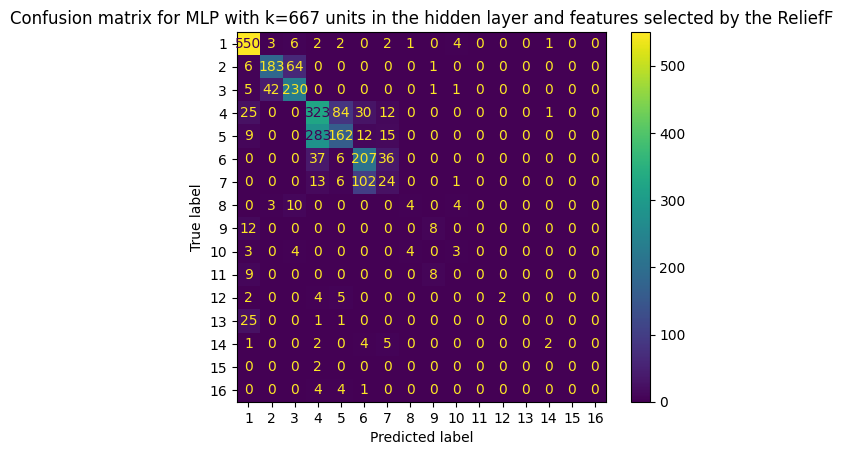

In [53]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={best_n_units} units in the hidden layer and features selected by the ReliefF')

O modelo final de MLP, com 667 neurónios na camada escondida, tem uma baixa accuracy, pela matriz de confusão. As razões para isto já foram descritas anteriormente: (i) o dataset não está balanceado, havendo certas actividades com muito mais amostras que outras; (ii) o modelo pode estar com dificuldade em distinguir certas actividades porque serem muito semelhantes.

Pelos resultados obtido, o modelo atingiu apenas um F1-score de 0.22, e pela matrix de confusão é possível observar a maior parte das amostras são consideradas como a atividade 1 (estar em pé) e 4 (andar), duas das classes que aparecem em maior quantidade no dataset. 
Apesar da atividade 5 (andar e falar), também aparecer um elevando número no dataset, verifica-se que é confundida com a atividade 4(andar), uma vez que as diferenças entre elas são mínimas.

##### Retrain model - 187 neurons

In [54]:
model = MLPClassifier(hidden_layer_sizes=(187,), activation='logistic', learning_rate='constant')
model.fit(x_train_total[features_to_use], y_train_total)
y_pred_2 = model.predict(x_test[features_to_use])

Recall: 0.6534804108025866
Precision: 0.6031664250281836
F-Score: 0.6194017891897611


<Figure size 640x480 with 0 Axes>

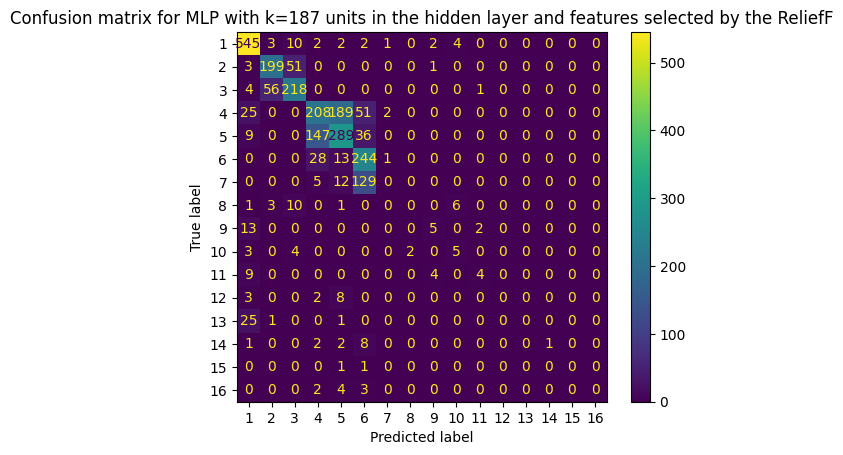

In [55]:
print('Recall:', calculate_recall(y_test, y_pred_2, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred_2, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred_2, 'weighted'))
calculate_confusion_matrix(y_test, y_pred_2, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={187} units in the hidden layer and features selected by the ReliefF')

O modelo final de MLP, com 442 neurónios na camada escondida, tem uma baixa accuracy, pela matriz de confusão. As razões para isto já foram descritas anteriormente: (i) o dataset não está balanceado, havendo certas actividades com muito mais amostras que outras; (ii) o modelo pode estar com dificuldade em distinguir certas actividades porque serem muito semelhantes.

Pelos resultados obtido, o modelo atingiu apenas um F1-score de 0.22, e pela matrix de confusão é possível observar a maior parte das amostras são consideradas como a atividade 1 (estar em pé) e 4 (andar), duas das classes que aparecem em maior quantidade no dataset. 
Apesar da atividade 5 (andar e falar), também aparecer um elevando número no dataset, verifica-se que é confundida com a atividade 4(andar), uma vez que as diferenças entre elas são mínimas.

#### Adaptative learning rate

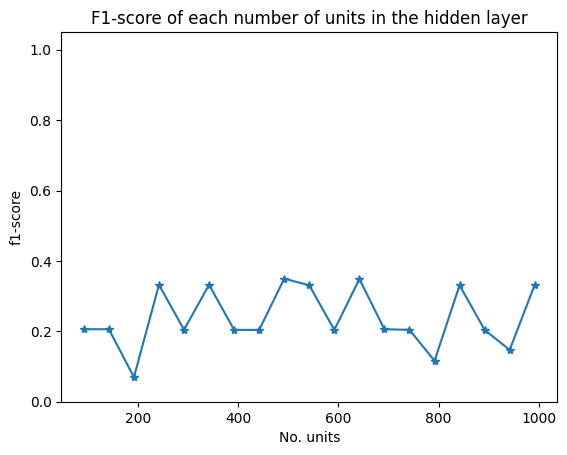

Max f1-score:  0.3497052443599904
Best no. of neurons:  492
CPU times: total: 1min 1s
Wall time: 3min 31s


In [ ]:
%%time
df, best_n_units_adapt = best_model(x_train, x_val, y_train, y_val, relieff_features[:best_n_features], learning_rate='invscaling', step=20, max_units=700)

Ao utilizar um learning rate variável, observa-se que os resultados do F1 diminuem. Este facto pode dever-se a que estamos a utilzar porcas épocas para treinar o modelo, pelo que necessitaria de muitas mais para fazer um bom treino do modelo, uma vez o learning rate vai variando.

##### Retrain best model

In [160]:
model = MLPClassifier(hidden_layer_sizes=(best_n_units_adapt,), solver='sgd', activation='logistic', learning_rate='invscaling', max_iter=500)
model.fit(x_train_total[features_to_use], y_train_total)
y_pred = model.predict(x_test[features_to_use])

Recall: 0.21719284899201216
Precision: 0.04749793825141285
F-Score: 0.07794916202038904


<Figure size 640x480 with 0 Axes>

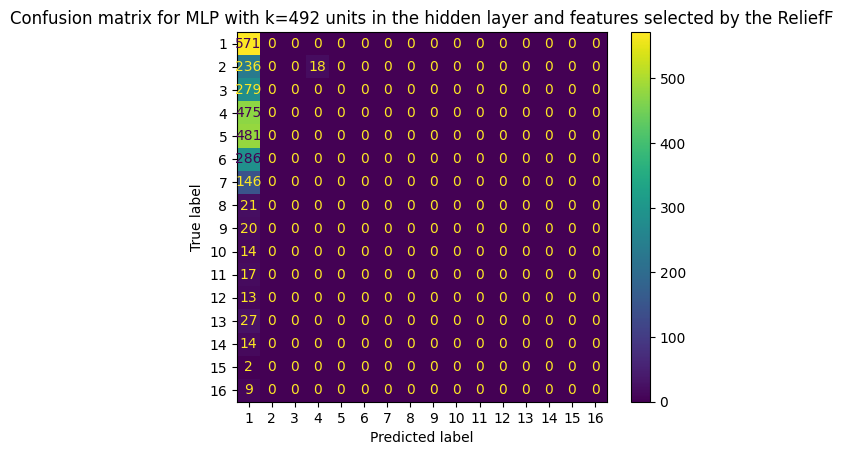

array([[571,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [236,   0,   0,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [279,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [475,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [481,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [286,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [146,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 17,   0,   0,   0,   

In [161]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred, labels=range(1, 16+1), title=f'Confusion matrix for MLP with k={best_n_units_adapt} units in the hidden layer and features selected by the ReliefF')

## Ex. 5 - Neural Network from scratch

In [ ]:
def sigmoid(data):
        # sigmoid function
        # return scipy.special.expit(data)
        return 1/(1 + np.exp(-data))

def sigmoid_derivative(data):
    # sigmoid derivative
    # return scipy.special.logit(data)
    return np.exp(-data) / np.power( (1+np.exp(-data)), 2)

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [2]:
def evaluate(a, b):
    return np.sum(a == b) / len(a)

In [5]:
class NeuralNetwork:
    # inspired on the video https://www.youtube.com/watch?v=w8yWXqWQYmU
    def __init__(self, input_size, units_in_hidden_layer, output_size, epochs, learning_rate=0.01):
        self.weights1 = np.random.rand(units_in_hidden_layer, input_size) - 0.5
        self.bias1 = np.random.rand(units_in_hidden_layer, 1) - 0.5
        self.weights2 = np.random.rand(output_size, units_in_hidden_layer) - 0.5
        self.bias2 = np.random.rand(output_size, 1) - 0.5

        self.epochs = epochs
        self.learning_rate = learning_rate

    def forward(self, x):
        self.out1 = self.weights1.dot(x) + self.bias1
        self.output_layer1 = sigmoid(self.out1)
        self.out2 = self.weights2.dot(self.output_layer1) + self.bias2
        self.output_layer_2 = sigmoid(self.out2)

    def backward_propagation(self, x, y):
        y = one_hot(y)
        error_2 = self.output_layer_2 - y
        len_x = x.shape[0]
        d_weights2 = 1 / len_x * error_2.dot(self.output_layer1.T)
        d_bias2 = 1 / len_x * np.sum(error_2)

        error_1 = self.weights2.T.dot(error_2) * sigmoid_derivative(self.out1)
        d_weights1 = 1 / len_x * error_1.dot(x.T)
        d_bias1 = 1 / len_x * np.sum(error_1)


        # update values
        self.weights1 = self.weights1 - self.learning_rate * d_weights1
        self.bias1 = self.bias1 - self.learning_rate * d_bias1
        self.weights2 = self.weights2 - self.learning_rate * d_weights2
        self.bias2 = self.bias2 - self.learning_rate * d_bias2

    def fit(self, x, y):
        for epoch in range(self.epochs):
            self.forward(x)
            if epoch % 50 == 0:
                pred = self.predict(x)
                print(f'Epoch {epoch} -- {evaluate(y, pred) * 100}')
            self.backward_propagation(x, y)

    def predict(self, x):
        pred = self.forward(x)
        return np.argmax(self.output_layer_2, 0)

In [4]:
## eviar x no formato (features, samples)